In [4]:
# import everything for a linear regression model
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
# plt
import matplotlib.pyplot as plt

import numpy as np
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D


from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [5]:
def reload_df():
    return pd.read_csv('cleaned_data.csv')

reload_df()

,Time,Res_Freq,Amplitude,Phase,Sample_number,Peak,Before_compression,After_compression,Compression_ratio,Compression_time
0,833.900697,1018.846491,0.210,86.46,6,1,13.99,11.2,1.249107,175.251024
1,833.900697,1018.846491,0.210,86.46,6,1,13.99,11.0,1.249107,175.251024
2,1413.399842,1023.293676,0.116,82.15,7,0,14.33,11.3,1.268142,340.756489
3,1413.399842,1023.293676,0.116,82.15,7,0,14.33,11.0,1.249107,340.756489
4,706.900433,1034.926293,0.230,85.26,7,0,14.33,11.3,1.268142,340.756489
...,...,...,...,...,...,...,...,...,...,...
20715,1010.703809,4292.083372,0.560,-104.01,9,1,12.80,10.3,1.242718,251.943409
20716,724.650448,4336.678654,0.562,-108.95,7,0,14.33,11.0,1.249107,340.756489
20717,724.550442,4336.678654,0.562,-108.95,7,0,14.33,11.0,1.249107,340.756489
20718,724.550442,4336.678654,0.562,-108.95,7,0,14.33,11.3,1.268142,340.756489


In [15]:
# df = pd.DataFrame(columns=["Time", "Res_Freq", "Amplitude", "Phase", "Sample_number", "Peak", "Before_compression", "After_compression", "Compression_ratio", "Compression_time"])
# create a model for linear regression on the data. you need to use the following columns:
# "Res_Freq", "Amplitude", "compression_ratio"
df = reload_df()
X = df[["Res_Freq", "Amplitude", "Compression_ratio"]]
y = df["Compression_time"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features for better convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the TensorFlow model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3,)),  # 3 input features (Res_Freq, Amplitude, Compression_ratio)
    tf.keras.layers.Dense(1)  # Output layer with one neuron for the prediction (Compression_time)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")



Epoch 1/100


ValueError: in user code:

    File "C:\Users\Weyrd\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Weyrd\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Weyrd\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Weyrd\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\Weyrd\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Weyrd\AppData\Roaming\Python\Python39\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_8" is incompatible with the layer: expected shape=(None, 3), found shape=(32, 2)


c:\Users\Weyrd\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Weyrd\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Weyrd\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Weyrd\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

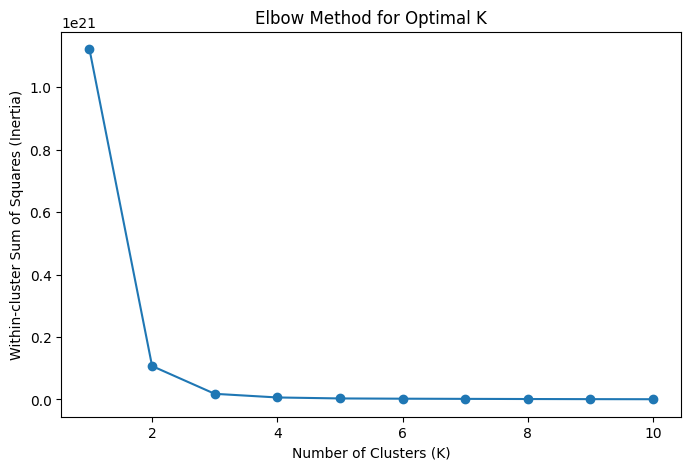

c:\Users\Weyrd\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


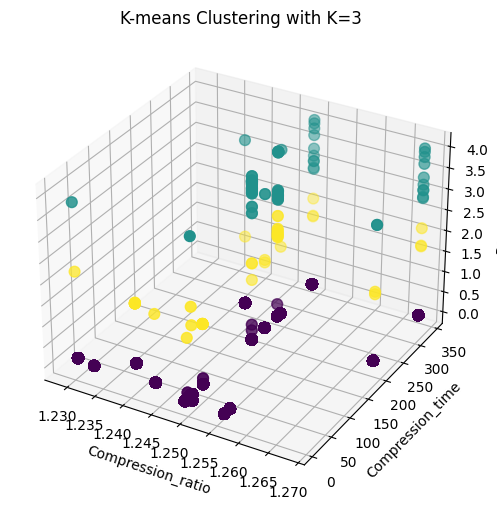

In [40]:
######### clustering :

# Assuming you have already loaded the data into a DataFrame called 'df'
# Preprocess the data if needed (e.g., handle missing values)

# what to plot 
plot_cols = ["Compression_ratio", "Compression_time", "Res_Freq"]
# Select the features for clustering
df = reload_df()    
X = df[plot_cols]

# Determine the optimal number of clusters using the "elbow method"
# In the elbow method, we plot the within-cluster sum of squares (inertia) for different values of K (number of clusters).
# The "elbow" point on the plot indicates the optimal K value where increasing K further doesn't provide significant reduction in inertia.
inertia_values = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.show()

# Based on the elbow curve, you can select the optimal number of clusters, let's say K=3
# Perform K-means clustering with K=3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Add the cluster labels to the original DataFrame
df['Cluster'] = clusters

# Visualize the clusters in 3D space (you can modify this based on the number of features)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# using plot_cols scatter and
ax.scatter(df[plot_cols[0]], df[plot_cols[1]], df[plot_cols[2]], c=df['Cluster'], s=60)
ax.set_xlabel(plot_cols[0])
ax.set_ylabel(plot_cols[1])
ax.set_zlabel(plot_cols[2])
plt.title('K-means Clustering with K=3')


plt.show()


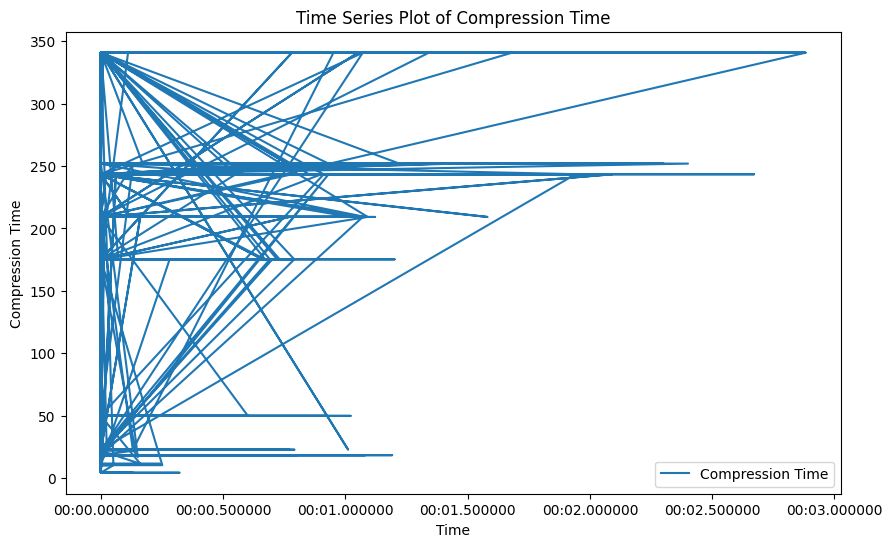

c:\Users\Weyrd\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Weyrd\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Weyrd\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Weyrd\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monoto

Mean Squared Error: 3934.177341375695


c:\Users\Weyrd\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Weyrd\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\Weyrd\AppData\Local\Temp\ipykernel_7996\3759104533.py:45: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps+1, closed='right')


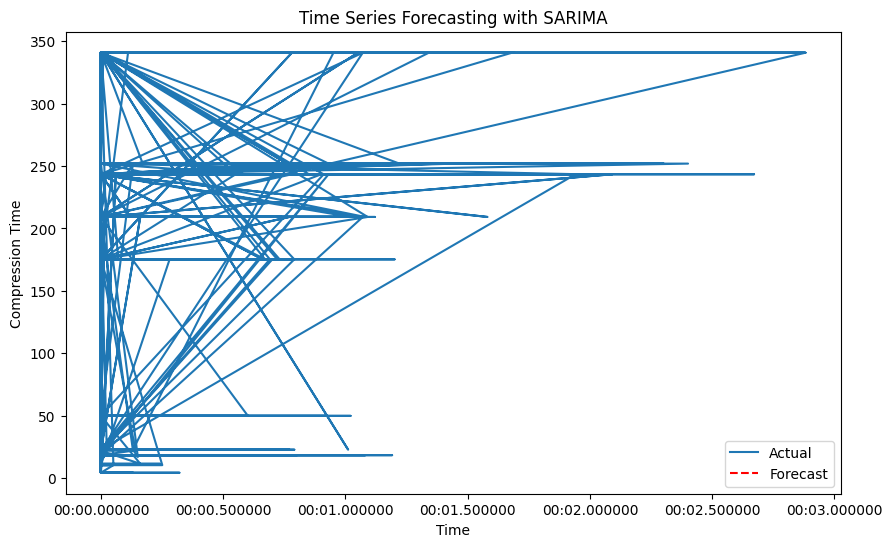

In [29]:
# Time analysis :

df = reload_df()    

# Assuming you have already loaded the data into a DataFrame called 'df'
# Preprocess the data if needed (e.g., handle missing values)

# Convert the "Time" column to a datetime object and set it as the DataFrame's index
df["Time"] = pd.to_datetime(df["Time"])
df.set_index("Time", inplace=True)

# Step 1: Time Series Plot
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["Compression_time"], label="Compression Time")
plt.xlabel("Time")
plt.ylabel("Compression Time")
plt.title("Time Series Plot of Compression Time")
plt.legend()
plt.show()

# Step 2: SARIMA Modeling
# Define the order and seasonal_order parameters for SARIMA model
# The order parameter (p, d, q) corresponds to the non-seasonal part of the SARIMA model.
# The seasonal_order parameter (P, D, Q, S) corresponds to the seasonal part of the SARIMA model.
# S is the seasonal period (e.g., 12 for monthly data, 4 for quarterly data, etc.)
order = (1, 0, 1)
seasonal_order = (1, 1, 1, 12)  # Assuming seasonality with a period of 12 (e.g., monthly data)

# Fit the SARIMA model
sarima_model = SARIMAX(df["Compression_time"], order=order, seasonal_order=seasonal_order)
sarima_model_fit = sarima_model.fit()

# Make predictions on the training data
predictions = sarima_model_fit.predict(start=0, end=len(df)-1)

# Calculate MSE
mse = mean_squared_error(df["Compression_time"], predictions)
print(f"Mean Squared Error: {mse}")

# Step 3: Time Series Forecasting
forecast_steps = 10  # Example: Forecasting the next 10 time steps
forecast = sarima_model_fit.forecast(steps=forecast_steps)

# Create a time index for the forecasted values
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps+1, closed='right')

# Combine original data with forecasted values for visualization
combined_df = pd.concat([df, pd.DataFrame(forecast, index=forecast_index, columns=["Compression_time"])])
plt.figure(figsize=(10, 6))
plt.plot(combined_df.index, combined_df["Compression_time"], label="Actual")
plt.plot(combined_df.index[-forecast_steps:], combined_df["Compression_time"].iloc[-forecast_steps:], label="Forecast", color='red', linestyle='--')
plt.xlabel("Time")
plt.ylabel("Compression Time")
plt.title("Time Series Forecasting with SARIMA")
plt.legend()
plt.show()




Epoch 1/10
467/467 [==============================] - 1s 1ms/step - loss: 0.1511 - val_loss: 7.1298e-05
Epoch 2/10
467/467 [==============================] - 0s 967us/step - loss: 6.4209e-05 - val_loss: 6.8850e-05
Epoch 3/10
467/467 [==============================] - 0s 931us/step - loss: 6.2715e-05 - val_loss: 6.6850e-05
Epoch 4/10
467/467 [==============================] - 0s 927us/step - loss: 6.1500e-05 - val_loss: 6.6650e-05
Epoch 5/10
467/467 [==============================] - 0s 968us/step - loss: 6.1843e-05 - val_loss: 6.6016e-05
Epoch 6/10
467/467 [==============================] - 1s 1ms/step - loss: 6.2359e-05 - val_loss: 7.2262e-05
Epoch 7/10
467/467 [==============================] - 0s 1ms/step - loss: 6.3497e-05 - val_loss: 6.6947e-05
Epoch 8/10
467/467 [==============================] - 0s 955us/step - loss: 6.3416e-05 - val_loss: 7.2956e-05
Epoch 9/10
467/467 [==============================] - 0s 978us/step - loss: 6.5192e-05 - val_loss: 6.6356e-05
Epoch 10/10
130/130 

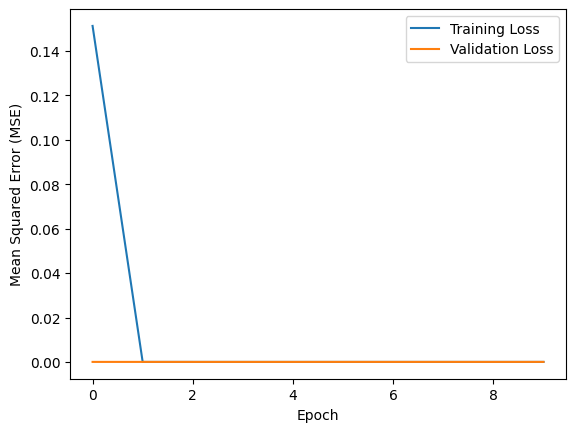

130/130 [==============================] - 0s 861us/step


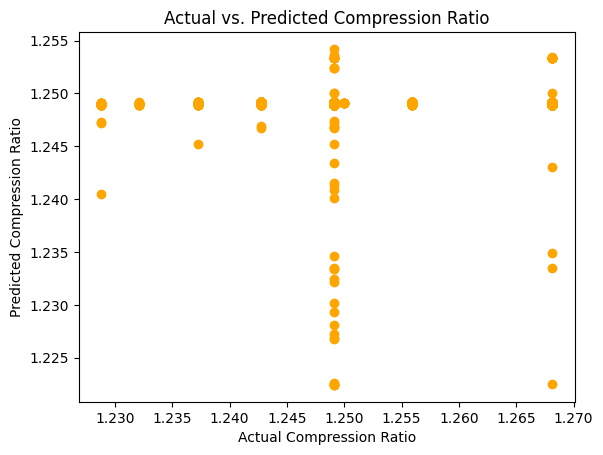

In [13]:

# Extract the features "Res_Freq" and "Amplitude"
X = df[["Res_Freq", "Amplitude"]].values

# Normalize the features using Min-Max scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Assuming you have a target variable for the neural network (e.g., "Compression_time" or any other target variable you want to predict)
y = df["Compression_ratio"].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(2,)),  # 2 input nodes for "Res_Freq" and "Amplitude"
    tf.keras.layers.Dense(16, activation='relu'),  # Hidden layer with 16 nodes
    tf.keras.layers.Dense(1)  # Output node for the target variable
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.show()

# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot the actual vs. predicted values with different colors for actual and predicted values
plt.scatter(y_test, y_pred, c=['blue'])
plt.xlabel('Actual Compression Ratio')
plt.ylabel('Predicted Compression Ratio')
plt.title('Actual vs. Predicted Compression Ratio')
plt.show()

In [17]:

# Extract the features "Res_Freq", "Amplitude", and "compression_ratio"
df = reload_df()
X = df[["Res_Freq", "Amplitude", "Compression_ratio"]]

# Split the data into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Standardize the features for better convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")

# Plot the data of the linear regression model
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Compression_time")
plt.ylabel("Predicted Compression_time")
plt.title("Actual vs. Predicted Compression_time (Linear Regression)")
plt.show()

KeyError: "['compression_ratio'] not in index"